In [1]:
import pandas as pd

In [2]:
excel_data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
excel_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
excel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
excel_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
excel_data['Award?'].value_counts()

Award?
0    2518
1    1481
Name: count, dtype: int64

In [7]:
Q1=excel_data.quantile(0.25)
Q3=excel_data.quantile(0.75)
iqr=Q3-Q1
lower_bound=Q1-1.5*iqr
upper_bound=Q3+1.5*iqr
outliers_remove=((excel_data<=lower_bound) | (excel_data>=upper_bound))

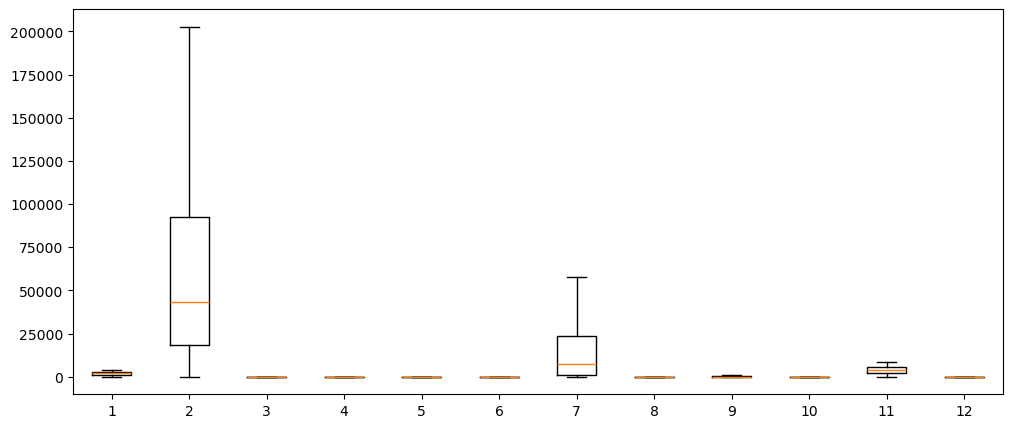

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.boxplot(excel_data,showfliers=False)
plt.show()

In [9]:
excel_data[outliers_remove].describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,0.0,2.660000e+02,3999.000000,0.0,3999.000000,3999.000000,280.000000,73.000000,569.000000,565.000000,0.0,0.0
mean,NaN,3.510418e+05,144.114529,NaN,1.014504,1.012253,82393.135714,45.191781,2759.430580,8.035398,NaN,NaN
std,NaN,1.985473e+05,773.663804,NaN,0.147650,0.195241,31710.360089,8.342757,2726.436441,6.938342,NaN,NaN
min,NaN,2.033530e+05,0.000000,NaN,1.000000,1.000000,57642.000000,38.000000,784.000000,3.000000,NaN,NaN
25%,NaN,2.316205e+05,0.000000,NaN,1.000000,1.000000,63553.750000,39.000000,1108.000000,4.000000,NaN,NaN
50%,NaN,2.833205e+05,0.000000,NaN,1.000000,1.000000,70428.500000,43.000000,1946.000000,5.000000,NaN,NaN
75%,NaN,3.841348e+05,0.000000,NaN,1.000000,1.000000,90287.000000,49.000000,3250.000000,10.000000,NaN,NaN
max,NaN,1.704838e+06,11148.000000,NaN,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,NaN,NaN


In [10]:
outlier_rows = excel_data[outliers_remove.any(axis=1)]
print(outlier_rows)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [11]:
numerical_cols=excel_data.select_dtypes(include=['int','float']).columns

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss=StandardScaler()

In [14]:
scaled_data=pd.DataFrame(ss.fit_transform(excel_data))

In [15]:
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
sc=MinMaxScaler()

In [18]:
data_norm=pd.DataFrame(sc.fit_transform(excel_data[numerical_cols]))

In [19]:
data_norm

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [20]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [21]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [22]:
model=AgglomerativeClustering(n_clusters=6)
model.fit(data_norm)

AgglomerativeClustering(n_clusters=6)

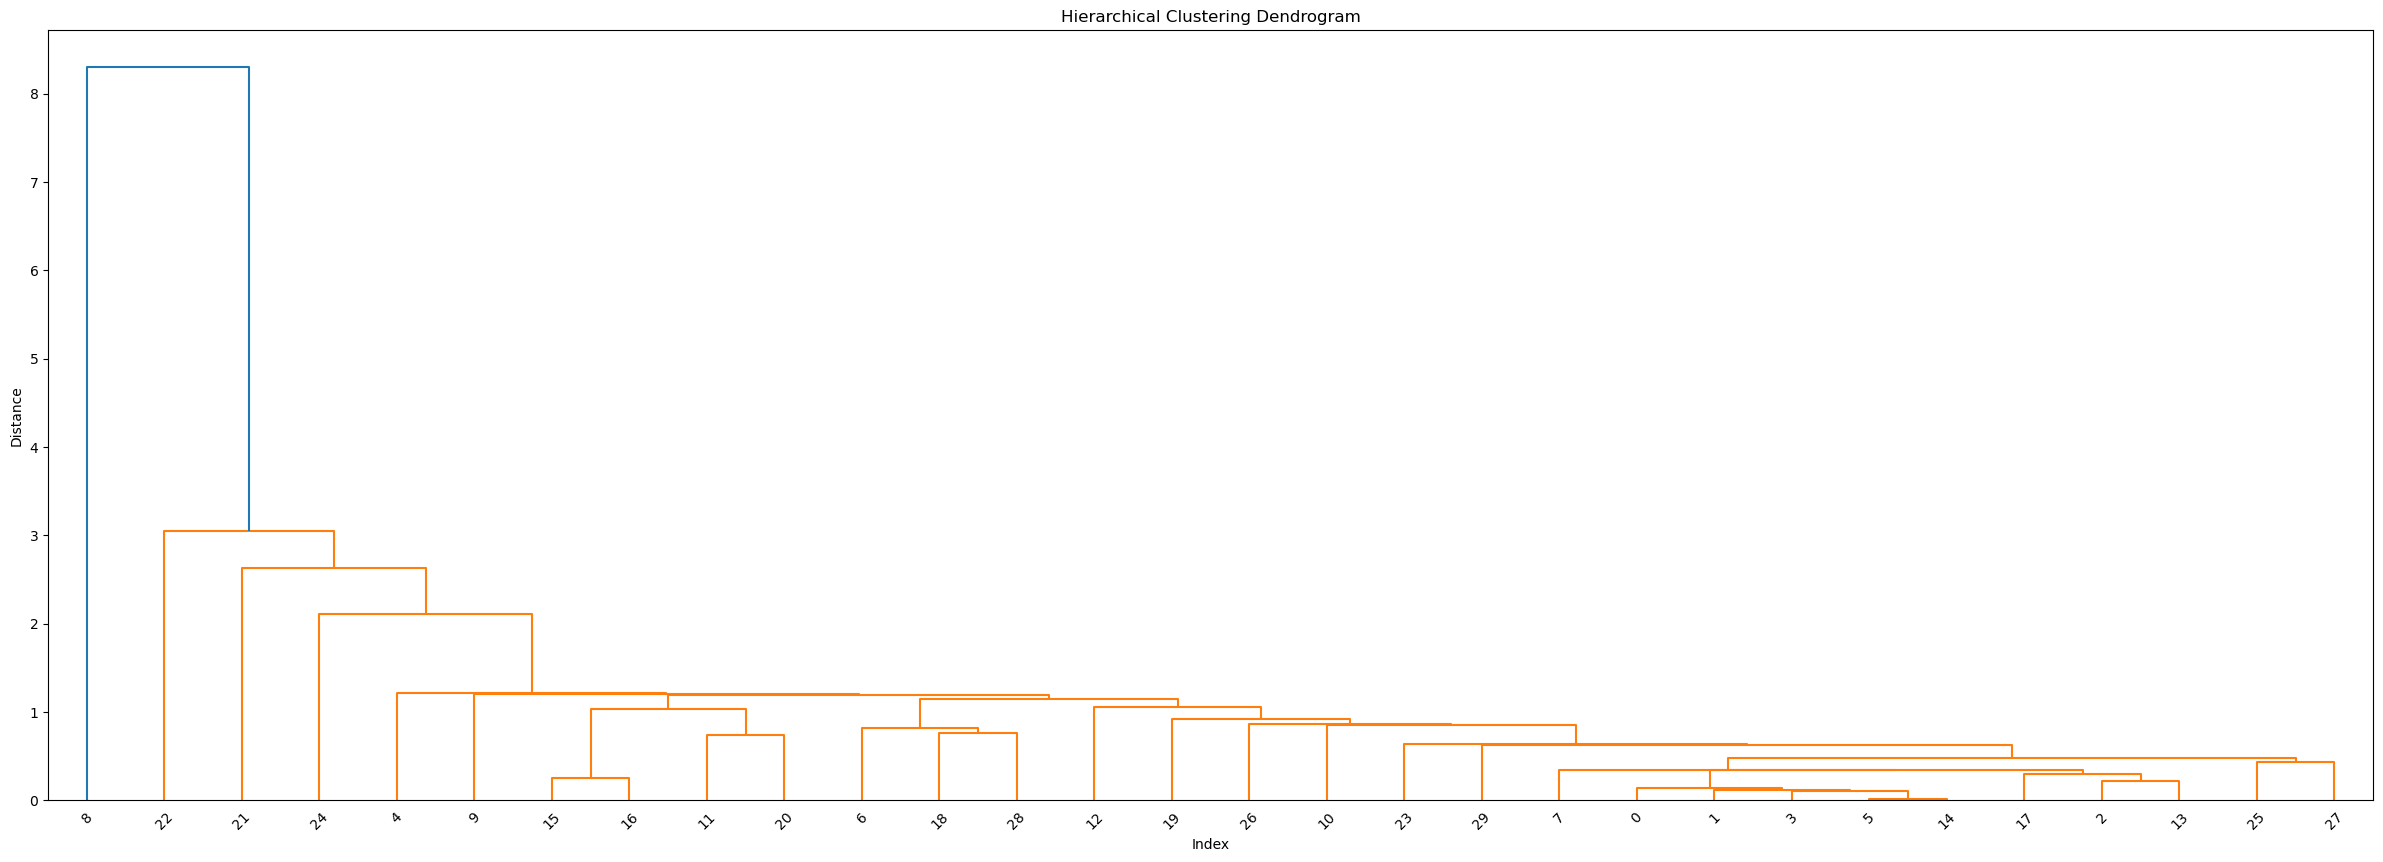

In [23]:
z=linkage(scaled_data.iloc[0:30,1:11],method="single",metric="euclidean")
plt.figure(figsize=(30,10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [32]:
h_complete=AgglomerativeClustering(n_clusters=5,linkage='average',metric="euclidean").fit(data_norm)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
excel_data["Clust"]=cluster_labels

In [34]:
excel_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [36]:
data=excel_data[(excel_data.Clust==1)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,1
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,1
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,1
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,1
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,1
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,1
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,1
2364,2382,108081,0,5,1,5,217006,24,0,0,3567,1,1


In [38]:
excel_data.iloc[:,1:11].groupby(excel_data.Clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Clust,,,,,,,,,,
0,95829.510929,241.230191,2.647541,1.01571,1.000683,27652.528005,15.504781,799.812842,2.459016,4619.886612
1,76565.125000,147.750000,3.875000,1.00000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000
2,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105
3,131999.500000,347.000000,2.500000,1.00000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000
4,460129.200000,0.000000,5.000000,1.00000,1.000000,228179.000000,31.200000,2878.600000,7.400000,7275.800000


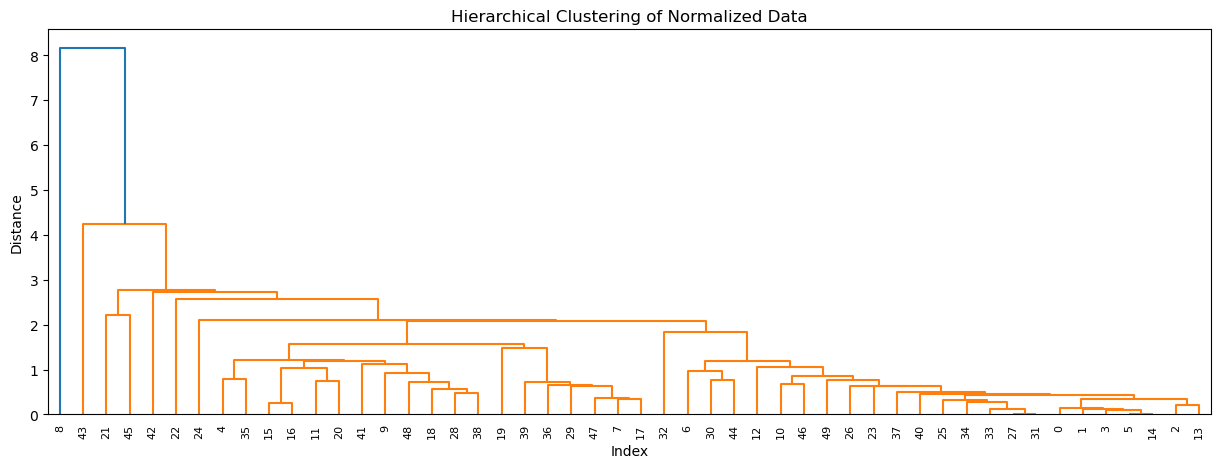

In [40]:
z=linkage(scaled_data.iloc[:50,:],method="single",metric="euclidean")
plt.figure(figsize=(15,5))
plt.xlabel("Index")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering of Normalized Data")
sch.dendrogram(z)
plt.show()

In [42]:
h_complete1=AgglomerativeClustering(n_clusters=5,linkage="average",metric="euclidean").fit(excel_data)
cluster_labels=pd.Series(h_complete1.labels_)
data_norm["Clust"]=cluster_labels

In [44]:
data_norm

,0,1,2,3,4,5,6,7,8,9,10,11,Clust
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [46]:
norm_data=excel_data[(data_norm.Clust==1)]
norm_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,0
466,472,1113394,2015,5,1,1,60883,26,2600,9,8228,1,0
481,487,1125076,0,3,1,1,23046,14,0,0,8107,0,2
488,494,1199220,2919,1,1,1,3800,19,3300,18,8023,1,0


In [48]:
excel_data.iloc[:,1:11].groupby(data_norm.Clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Clust,,,,,,,,,,
0,6.722714e+04,139.818733,2.045948,1.014643,1.011613,16728.605403,11.501641,447.726837,1.329462,4095.145923
1,1.184935e+06,1910.000000,3.500000,1.000000,1.000000,44595.500000,22.750000,2237.500000,8.500000,7956.250000
2,6.125255e+05,493.857143,3.571429,1.000000,1.107143,58403.392857,22.285714,1656.928571,5.428571,6409.535714
3,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000
4,8.899450e+05,204.800000,3.400000,1.000000,1.000000,93889.800000,18.200000,1230.000000,3.600000,6134.200000


In [50]:
norm_data=excel_data[(data_norm.Clust==0)]
norm_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [52]:
norm_data=excel_data[(data_norm.Clust==2)]
norm_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
43,44,619393,0,3,1,1,15008,14,0,0,7819,1,0
72,74,550367,0,3,1,1,12500,13,50,1,7801,0,2
87,90,609477,0,3,1,1,21422,22,1200,8,6820,0,2
126,129,602064,0,5,1,1,194753,26,2250,10,7652,1,4
186,190,707079,0,4,1,1,57173,40,3450,12,7523,1,0
244,248,468175,0,5,1,1,141615,22,0,0,7348,1,0
290,294,568174,0,5,1,1,67121,16,1000,2,7243,1,0
313,317,714717,0,5,1,1,119162,20,1750,4,7183,1,0
318,322,766419,0,1,1,1,11398,3,398,1,7162,1,0
383,388,479989,0,4,1,1,66516,26,1600,6,6980,0,2


In [54]:
norm_data=excel_data[(data_norm.Clust==3)]
norm_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,0


In [56]:
norm_data=excel_data[(data_norm.Clust==4)]
norm_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,0
151,154,930410,0,5,1,1,211284,18,2250,6,7640,1,4
510,516,889456,1024,5,1,1,98959,29,850,4,6652,1,0
1188,1200,837979,0,1,1,1,18372,15,1450,4,5373,1,0
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,0


In [60]:
from sklearn.metrics import silhouette_score
score=silhouette_score(scaled_data,cluster_labels)
score

0.5153576001655467

## KMeans Clustering

In [62]:
from sklearn.cluster import KMeans

In [64]:
df=MinMaxScaler()
df_norm=df.fit(excel_data)
df_norm

MinMaxScaler()

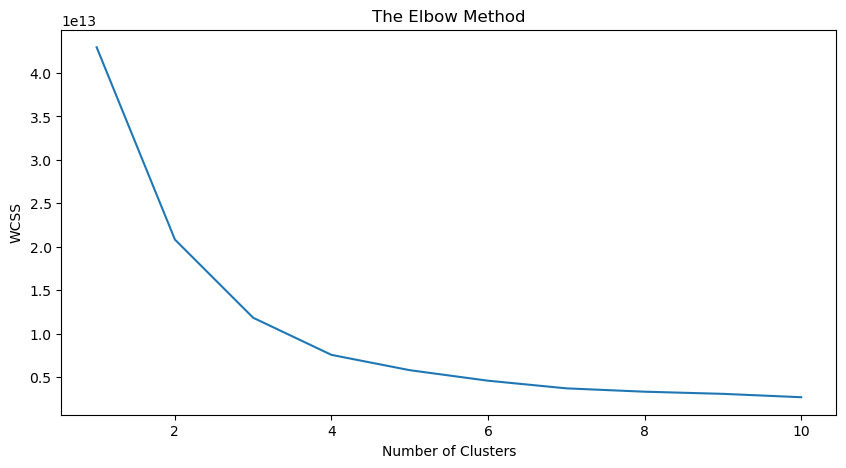

In [66]:
plt.figure(figsize=(10,5))
WCSS=[]
for i in range(1,11):
    clf=KMeans(n_clusters=i)
    clf.fit(excel_data)
    WCSS.append(clf.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [68]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans
labels=kmeans.fit_predict(scaled_data)

In [70]:
score=silhouette_score(scaled_data,labels)
score

0.22808887010836637

In [72]:
kmeans.cluster_centers_

array([[ 0.96348204, -0.33447901, -0.04889987, -0.48734503,  0.01619205,
        -0.06276658, -0.45026351, -0.39262157, -0.18437536, -0.20386635,
        -0.95068552, -0.32826237],
       [-0.41557722,  0.53722948,  0.02079723,  1.37989762, -0.08478884,
         0.18140525,  1.19026584,  0.82327074, -0.06342671, -0.06760719,
         0.41591883,  0.66642103],
       [-0.79328273, -0.1648967 , -0.06171985, -0.50524757,  0.0270986 ,
        -0.05881706, -0.46621457, -0.37541717, -0.1658828 , -0.17656592,
         0.772364  , -0.24002927],
       [-0.22708278,  1.20284695,  0.8613124 ,  0.10111012,  0.16228153,
        -0.06276658,  0.63485991,  1.68030149,  3.607528  ,  3.91562026,
         0.27255539,  0.93222938]])

In [74]:
clf=KMeans(n_clusters=2)
clf
y_kmeans=clf.fit_predict(scaled_data)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='Bonus_trans', ylabel='Qual_miles'>

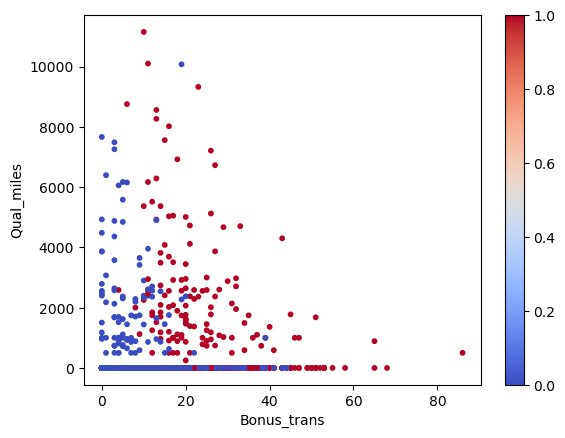

In [128]:
excel_data.plot(x='Bonus_trans',y='Qual_miles',kind='scatter',s=10,c=clf.labels_,cmap='coolwarm')

In [130]:
clf.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
clf.cluster_centers_

array([[ 0.25463143, -0.29626388, -0.07650522, -0.52836321,  0.02028366,
        -0.0551381 , -0.47604587, -0.430073  , -0.17814846, -0.19617504,
        -0.25835808, -0.32669287],
       [-0.52089873,  0.6060661 ,  0.15650648,  1.08087097, -0.04149421,
         0.11279585,  0.97384555,  0.87979899,  0.36443775,  0.40131467,
         0.52852232,  0.66831458]])

In [134]:
WCSS

[42967206851173.65,
 20828852097968.23,
 11827420962070.963,
 7554791831333.66,
 5793688036043.6455,
 4582467880275.835,
 3702878255927.335,
 3318083845390.5034,
 3069580141380.6924,
 2682046082245.9917]

## DBScan Clustering

In [136]:
excel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  Clust              3999 non-null   int64
dtypes: int64(13)
memory usage: 406.3 KB


In [138]:
data=excel_data.drop('Award?',axis=1)
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,2
1,2,19244,0,1,1,1,215,2,0,0,6968,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,2
3,4,14776,0,1,1,1,500,1,0,0,6952,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,2


In [140]:
array=data.values
array

array([[    1, 28143,     0, ...,     0,  7000,     2],
       [    2, 19244,     0, ...,     0,  6968,     2],
       [    3, 41354,     0, ...,     0,  7034,     2],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     0],
       [ 4020, 54899,     0, ...,     1,  1401,     2],
       [ 4021,  3016,     0, ...,     0,  1398,     2]], dtype=int64)

In [142]:
X=sc.fit_transform(array)

In [144]:
X

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.43742464e-01, 5.00000000e-01],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.39884254e-01, 5.00000000e-01],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.47841813e-01, 5.00000000e-01],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.68796721e-01, 0.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.88679245e-02, 1.68676151e-01, 5.00000000e-01],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 5.00000000e-01]])

In [146]:
X=df.fit_transform(array)
X

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.43742464e-01, 5.00000000e-01],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.39884254e-01, 5.00000000e-01],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.47841813e-01, 5.00000000e-01],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.68796721e-01, 0.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.88679245e-02, 1.68676151e-01, 5.00000000e-01],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 5.00000000e-01]])

In [148]:
from sklearn.cluster import DBSCAN

In [150]:
dbscan=DBSCAN(eps=3,min_samples=5)

In [152]:
dbscan

DBSCAN(eps=3)

In [154]:
dbscan.fit(scaled_data)

DBSCAN(eps=3)

In [164]:
labels=dbscan.fit_predict(scaled_data)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [178]:
dbscan.labels_
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl.value_counts()

cluster
 0         3888
-1           73
 2           25
 1           13
Name: count, dtype: int64

In [190]:
new_data=pd.concat([excel_data,cl],axis=1)
new_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0


<Axes: xlabel='Balance', ylabel='Bonus_trans'>

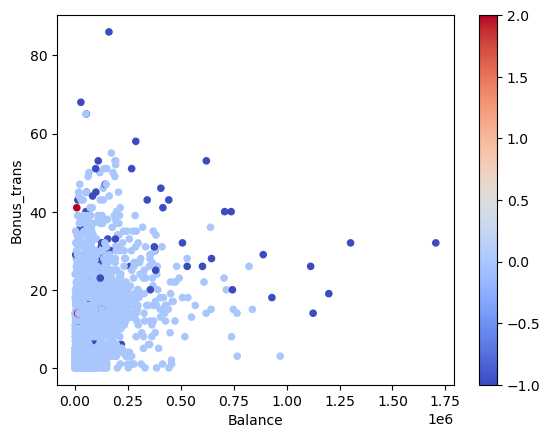

In [196]:
excel_data.plot(x='Balance',y='Bonus_trans',kind='scatter',cmap='coolwarm',c=dbscan.labels_)

In [198]:
from sklearn.metrics import silhouette_score

In [200]:
if len(set(labels))>1 and -1 in labels:
    score=silhouette_score(scaled_data,labels)
    print("Silhouette_Score",score)
else:
    print("Silhouettee Score is not Calculated for the given Cluestering")

Silhouette_Score 0.5136199917197446


In [202]:
silhouette_score(scaled_data,labels)

0.5136199917197446

By this we learned that silhouette_score of dbscan model is more than silhouette_score of k_means clustering model
So DBSCAN clustering model is the best model